<a href="https://colab.research.google.com/github/chambai/Deep_Learning_Course/blob/main/Week%204%20DL%20NLP%201/IMDBSentiment_Sln.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis on IMDB Movie Reviews

Adapted from https://machinelearningmastery.com/predict-sentiment-movie-reviews-using-deep-learning/

The Large Movie Review Dataset (often referred to as the IMDB dataset) contains 25,000 highly polar moving reviews (good or bad) for training and the same amount again for testing. The problem is to determine whether a given movie review has a positive or negative sentiment.

The data was collected by Stanford researchers and was used in a 2011 paper [PDF] where a split of 50/50 of the data was used for training and test. An accuracy of 88.89% was achieved.

The data was also used as the basis for a Kaggle competition titled “Bag of Words Meets Bags of Popcorn” in late 2014 to early 2015. Accuracy was achieved above 97% with winners achieving 99%

The IMDB dataset is avaialble in Keras and is ready for use in deep neural networks.  The words have been replace by integers that indicate the popularity of the word in the dataset

## Load the dataset

In [ ]:
# load the dataset and explore the data
import numpy
from keras.datasets import imdb
from matplotlib import pyplot
# load the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data()
X = numpy.concatenate((X_train, X_test), axis=0)
y = numpy.concatenate((y_train, y_test), axis=0)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

## Explore the dataset

In [ ]:
# display the shape of the dataset
print("Training data: ")
print(X.shape)
print(y.shape)

Training data: 
(50000,)
(50000,)


In [ ]:
# Find number of classes
print("Classes: ")
print(numpy.unique(y))

Classes: 
[0 1]


In [ ]:
# get the number of words
print("Number of words: ", len(numpy.unique(numpy.hstack(X))))   # numpy.hstack Stack arrays in sequence horizontally (column wise)
print("Review 1: ", X[0])
print("Review 2: ", X[1])

Number of words:  88585
Review 1:  [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
R

Review length: 
Mean 234.76 words (172.911495)


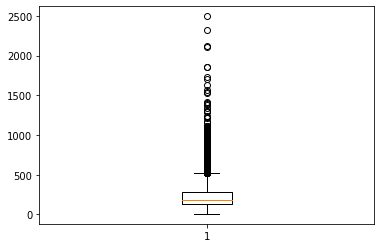

In [ ]:
# get the average review length
print("Review length: ")
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (numpy.mean(result), numpy.std(result)))
# plot review length
pyplot.boxplot(result)
pyplot.show()

The average review length is just under 300 and the standard deviation (dispersion of the dataset relative to its mean) is just over 200 words

Limit the dataset for this exercise

In [ ]:
# limit the vocabulary to the 5000 most used words
imdb.load_data(num_words=5000)

# we don't need to change the text into numeric sequences as the data 
# is already stored as numbers in the Keras IMDB dataset
# truncate or pad each review to 500 words each and form our sequences
from keras.preprocessing import sequence
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)
print(X_train)
print(X_train.shape)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

[[    0     0     0 ...    19   178    32]
 [    0     0     0 ...    16   145    95]
 [    0     0     0 ...     7   129   113]
 ...
 [    0     0     0 ...     4  3586 22459]
 [    0     0     0 ...    12     9    23]
 [    0     0     0 ...   204   131     9]]
(25000, 500)


# Simple Multi Layer Perceptron for Sentiment Classification
##**Exercise:** Implement a feed forward (MLP) network and experiment with how the following affects the accuracy:

1.   Number of words in the vocabulary 
2.   Output dimension of the embedding layer

With a one-layer MLP, about 87% accuracy can be acheived (precise accuracy will vary due to stochastic nature of the model)








In [ ]:
# MLP for the IMDB problem
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.embeddings import Embedding

# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

# decide on the maximum amount of words for a review
max_words = 500
# create sequences of the words
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

# decide the output dimension of the embedding layer (an arbitary number that can be tuned)
output_dim = 32
# create the model
model = Sequential()
model.add(Embedding(top_words, output_dim, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=2)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, 500, 128)          6400000   
_________________________________________________________________
flatten_17 (Flatten)         (None, 64000)             0         
_________________________________________________________________
dense_43 (Dense)             (None, 250)               16000250  
_________________________________________________________________
dense_44 (Dense)             (None, 250)               62750     
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 251       
Total params: 22,463,251
Trainable params: 22,463,251
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/2
196/196 - 17s - loss: 0.4735 - accuracy: 0.7383 - val_loss: 0.2971 - val_accuracy: 0.8768
Ep

The more words used in the vocabulary, the higher the accuracy that can be obtained.

In this particular model, the output dimension of the embedding layer does not have much of an impact. It depends on the particular problem as to whether this has an effect.

Adding 2 more hidden layers with the same number of units reduces the accuracy by approx 2%

# One Dimensional Convolutional Neural Network

##**Exercise:**  Implement a 1D Convolutional neural network

Does it acheive a better accuracy than the MLP model?

In [ ]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D
from keras.preprocessing import sequence

# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

# pad dataset to a maximum review length in words
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Conv1D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=2)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_35 (Embedding)     (None, 500, 32)           160000    
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 8000)              0         
_________________________________________________________________
dense_76 (Dense)             (None, 250)               2000250   
_________________________________________________________________
dense_77 (Dense)             (None, 1)                 251       
Total params: 2,163,605
Trainable params: 2,163,605
Non-trainable params: 0
___________________________________________

In the summary of the network structure, you can see that the convolutional layer preserves the dimenionality of the embedding input layer of 32 dimensional input with a max of 500 words.  The pooling layer compresses this representation by halving it.

A small improvement over the MLP network is acheived

##**Exercise:** Create a network with one RNN layer to perform sentiment analysis.

Experiment with the number of memory cells in a layer

In [ ]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Flatten, Embedding, SimpleRNN
from keras.preprocessing import sequence

# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

# pad dataset to a maximum review length in words
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

# create the model
model = Sequential()
# add your model here
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(SimpleRNN(64))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=2)
model.summary()

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

Epoch 1/2
196/196 - 80s - loss: 0.6204 - accuracy: 0.6280 - val_loss: 0.4048 - val_accuracy: 0.8220
Epoch 2/2
196/196 - 79s - loss: 0.3573 - accuracy: 0.8493 - val_loss: 0.4426 - val_accuracy: 0.7956
Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_37 (Embedding)     (None, 500, 32)           160000    
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 64)                6208      
_________________________________________________________________
flatten_27 (Flatten)         (None, 64)                0         
_________________________________________________________________
dense_83 (Dense)             (None, 250)               16250     
_________________________________________________________________
dense_84 (Dense)             (None, 1)                 251       
Total params: 182,709
Trainable params: 182,709
Non

##**Exercise:** Create a network with mutliple RNN layers to perform sentiment analysis.

Experiment with the number of layers and number of memory cells in a layer

In [1]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Flatten, Embedding, SimpleRNN
from keras.preprocessing import sequence

# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

# pad dataset to a maximum review length in words
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

# create the model
model = Sequential()
# add your model here
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(SimpleRNN(64,return_sequences=True))
model.add(SimpleRNN(64,return_sequences=True))
model.add(SimpleRNN(64))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=2)
model.summary()

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

Epoch 1/2
196/196 - 218s - loss: 0.7031 - accuracy: 0.5051 - val_loss: 0.7566 - val_accuracy: 0.4992
Epoch 2/2
196/196 - 212s - loss: 0.7062 - accuracy: 0.4984 - val_loss: 0.6968 - val_accuracy: 0.5000
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           160000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 500, 64)           6208      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 500, 64)           8256      
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 64)                8256      
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
____________________________________________________

Takes longer to train than the Conv1D network. Lower accuracy than the Conv1D.  Has probably 'forgotten' some of the words at the begining of the sequence.

##**Exercise:** Create a network with one GRU layer to perform sentiment analysis.

Experiment with the number of memory cells in a layer

In [ ]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Flatten, Embedding, GRU
from keras.preprocessing import sequence

# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

# pad dataset to a maximum review length in words
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

# create the model
model = Sequential()
# add your model here
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(GRU(64))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=2)
model.summary()

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

Epoch 1/2
196/196 - 8s - loss: 0.5352 - accuracy: 0.7122 - val_loss: 0.3804 - val_accuracy: 0.8268
Epoch 2/2
196/196 - 6s - loss: 0.3017 - accuracy: 0.8729 - val_loss: 0.3219 - val_accuracy: 0.8643
Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_38 (Embedding)     (None, 500, 32)           160000    
_________________________________________________________________
gru (GRU)                    (None, 64)                18816     
_________________________________________________________________
flatten_28 (Flatten)         (None, 64)                0         
_________________________________________________________________
dense_85 (Dense)             (None, 250)               16250     
_________________________________________________________________
dense_86 (Dense)             (None, 1)                 251       
Total params: 195,317
Trainable params: 195,317
Non-t

##**Exercise:** Create a network with multiple GRU layers to perform sentiment analysis.

Experiment with the number of layers and number of memory cells in a layer

In [ ]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Flatten, Embedding, GRU
from keras.preprocessing import sequence

# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

# pad dataset to a maximum review length in words
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

# create the model
model = Sequential()
# add your model here
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(GRU(64,return_sequences=True))
model.add(GRU(64,return_sequences=True))
model.add(GRU(64))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=2)
model.summary()

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Faster to train than the RNN. Higher accuracy than the RNN.

##**Exercise:** Create a network with one LSTM layer to perform sentiment analysis.

In [ ]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.preprocessing import sequence

# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

# pad dataset to a maximum review length in words
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(LSTM(64))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=2)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))



<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_39 (Embedding)     (None, 500, 32)           160000    
_________________________________________________________________
lstm_27 (LSTM)               (None, 64)                24832     
_________________________________________________________________
dense_87 (Dense)             (None, 256)               16640     
_________________________________________________________________
dense_88 (Dense)             (None, 1)                 257       
Total params: 201,729
Trainable params: 201,729
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
196/196 - 10s - loss: 0.4618 - accuracy: 0.7725 - val_loss: 0.3375 - val_accuracy: 0.8556
Epoch 2/2
196/196 - 8s - loss: 0.2671 - accuracy: 0.8927 - val_loss: 0.2881 - val_accuracy: 0.8812
Accuracy: 88.12%


Acheived about the same as the 1D convolutional network in this example

##**Exercise:** Create a network with more than one LSTM layer to perform sentiment analysis.

Experiment with the number of LSTM layers and the number of memory cells in a layer to see if you can improve performance

In [ ]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from keras.preprocessing import sequence

# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

# pad dataset to a maximum review length in words
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words)) # learns a representation of the words into a fixed size of 32
model.add(LSTM(16, return_sequences=True))
model.add(LSTM(16, return_sequences=True))
model.add(LSTM(16, return_sequences=True))
model.add(LSTM(16))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=2)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_32 (Embedding)     (None, 500, 32)           160000    
_________________________________________________________________
lstm_21 (LSTM)               (None, 500, 16)           3136      
_________________________________________________________________
lstm_22 (LSTM)               (None, 500, 16)           2112      
_________________________________________________________________
lstm_23 (LSTM)               (None, 500, 16)           2112      
_________________________________________________________________
lstm_24 (LSTM)               (None, 16)                2112      
_________________________________________________________________
dense_68 (Dense)             (None, 256)               4352      
_________________________________________________________________
dense_69 (Dense)             (None, 1)               

This network configuration acheives about the same as the single layer LSTM above, but has not been tuned, so there could be a better option!